<a href="https://colab.research.google.com/github/joshmuhu/pm2.5/blob/main/PM2_5_prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting PM2.5 concentration in the air**

---

The objective of this challenge is to predict PM2.5 particulate matter concentration in the air every day for each city. PM2.5 refers to atmospheric particulate matter that have a diameter of less than 2.5 micrometers and is one of the most harmful air pollutants. PM2.5 is a common measure of air quality that normally requires ground-based sensors to measure. The data covers the last three months, spanning hundreds of cities across the globe.
The data comes from 3 main sources : 
1. Ground-based air quality sensors.<br/> 
These measure the target variable (PM2.5 particle concentration). In addition to the target column (which is the daily mean concentration) there are also columns for minimum and maximum readings on that day, the variance of the readings and the total number (count) of sensor readings used to compute the target value. This data is only provided for the train set - you must predict the target variable for the test set.
2. The Global Forecast System (GFS) for weather data. <br/>Humidity, temperature and wind speed, which can be used as inputs for your model.
3. The Sentinel 5P satellite.<br/> This satellite monitors various pollutants in the atmosphere. For each pollutant, we queried the offline Level 3 (L3) datasets available in Google Earth Engine (you can read more about the individual products here: https://developers.google.com/earth-engine/datasets/catalog/sentinel-5p). For a given pollutant, for example NO2, we provide all data from the Sentinel 5P dataset for that pollutant. This includes the key measurements like NO2_column_number_density (a measure of NO2 concentration) as well as metadata like the satellite altitude. We recommend that you focus on the key measurements, either the column_number_density or the tropospheric_X_column_number_density (which measures density closer to Earth’s surface).

Applying the different classification algorithims and evaluating their performances


The data provided is in terms of train and test csv


1. We understand the dataset description
2. identify null fields,
3. Identify the categorical and continous data
4. Feature scaling
5. Identify outliers
6. Skewness in the data
7. Correlation between prices and features
8. Splitting our training data set
9. training with the different algorithims while evaluating their performance



In [128]:
# reading the folder containing the datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [239]:
# train = pd.read_csv('/content/drive/MyDrive/air quality/Train (3).csv')test = pd.read_csv('/content/drive/MyDrive/air quality/Test (2).csv')
train = pd.read_csv("https://raw.githubusercontent.com/joshmuhu/pm2.5/main/Train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/joshmuhu/pm2.5/main/Test.csv")

In [172]:
train.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726936,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [173]:
# dataset column informations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [174]:
#understanding the shape of our dataset
train.shape, test.shape

((30557, 82), (16136, 77))

In [240]:
#turning the date feature into a timestamp we can deal with
train['Date'] = pd.to_datetime(train['Date'])
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['Dayofweek'] = train['Date'].dt.dayofweek
train['DayOfyear'] = train['Date'].dt.dayofyear
train['WeekOfyear'] = train['Date'].dt.weekofyear
#same for the test data set
test['Date'] = pd.to_datetime(test['Date'])
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
test['Dayofweek'] = test['Date'].dt.dayofweek
test['DayOfyear'] = test['Date'].dt.dayofyear
test['WeekOfyear'] = test['Date'].dt.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [176]:
#setting our default figure size
plt.rcParams["figure.figsize"] = (20,3)

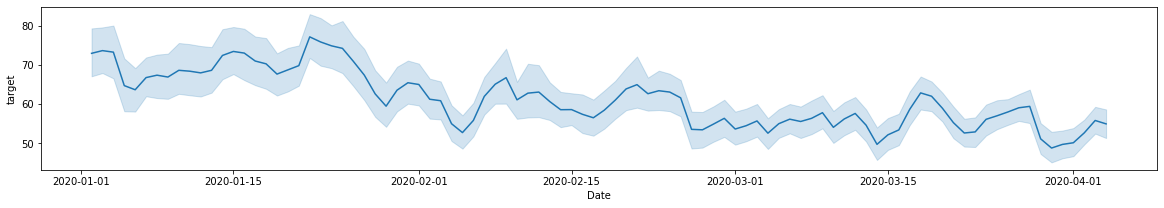

In [177]:
# Plotting the target for the different events and regions against date
sns.lineplot(x="Date", y="target",
            
             data=train)

In [241]:
#dropping the columns that are not needed
train.drop(['Place_ID X Date','Date','target_min','target_max','target_variance','target_count'], axis=1, inplace=True)
test.drop(['Place_ID X Date','Date'], axis=1, inplace=True)

In [242]:
train.shape, test.shape

((30557, 81), (16136, 80))

In [243]:
# select numerical columns
df_numeric = train.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# select non-numeric columns
df_non_numeric = train.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

In [245]:
#skewness and kurtness
skew = {}
kurt = {}
for i in numeric_cols:
   skew[i] = train[i].skew()
   kurt[i] = train[i].kurt()

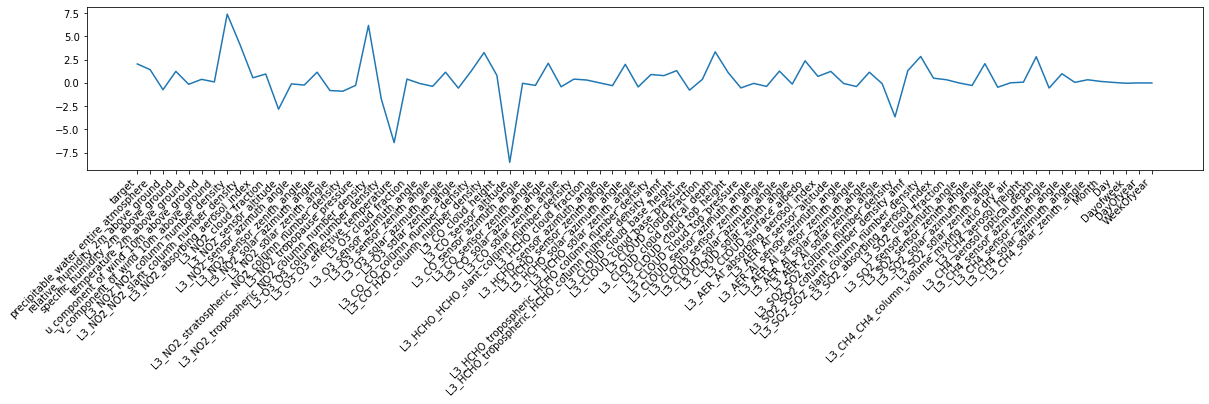

In [246]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(list(skew.keys()),list(skew.values()))
plt.xticks(rotation=45, horizontalalignment="right")

plt.show()

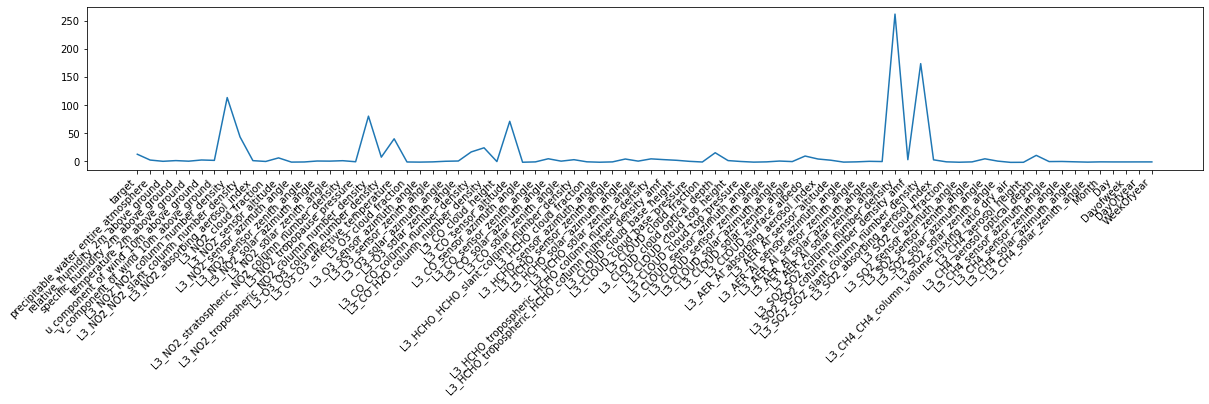

In [247]:
#plotting kurtness
plt.plot(list(kurt.keys()),list(kurt.values()))
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()

In [248]:
non_numeric_cols

array(['Place_ID'], dtype=object)

In [249]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

Missing values <br/>
We will start by calculating the percentage of values missing in each column, and then storing this information in a DataFrame.

In [250]:
# % of values missing in each column
values_list = list()
cols_list = list()
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list

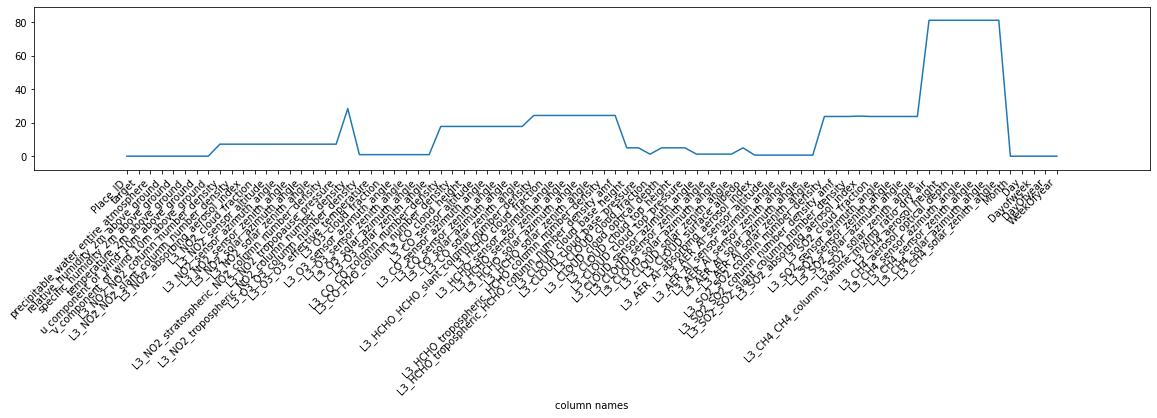

In [251]:
#visualization with column names
plt.plot(pct_missing_df.col, pct_missing_df["pct_missing"])
plt.xticks(pct_missing_df.col, pct_missing_df.col, rotation=45,
horizontalalignment="right")
plt.xlabel("column names")
plt.margins(0.1)
plt.show()

Lets use strategies to deal with missing values
1. Droping observations

In [252]:
less_missing_values_cols_list = list(pct_missing_df.loc[(pct_missing_df.pct_missing < 0.5) & (pct_missing_df.pct_missing > 0), 'col'].values)
train.dropna(subset=less_missing_values_cols_list, inplace=True)

In [253]:
train.shape

(30557, 81)

Remove columns (features)<br/>
Drop all those columns that have more than 40% values missing in them.

In [254]:
# dropping columns with more than 40% null values
_40_pct_missing_cols_list = list(pct_missing_df.loc[pct_missing_df.pct_missing > 40, 'col'].values)
train.drop(columns=_40_pct_missing_cols_list, inplace=True)

In [255]:
train.shape
# this has reduced our columns from 82 to 75

(30557, 74)

Impute missing values
There is still missing data left in our dataset. We will now impute the missing values in each numerical column with the median value of that column.

In [194]:
#replacing null in numeric using median
df_numeric = train.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = train[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        med = train[col].median() #impute with the median
        train[col] = train[col].fillna(med)


Missing values in numerical columns are now fixed. In the case of categorical columns, we will replace missing values with the mode values of that column.

In [195]:
df_non_numeric = train.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = train[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        mod = train[col].describe()['top'] # impute with the most frequently occuring value
        train[col] = train[col].fillna(mod)

Verifying whether all nulls have been replaced once it shows 0 we have zero nulls

In [196]:
train.isnull().sum().sum()

0

Duplicates<br/>
Check for duplicates


In [197]:
# dropping duplicates by considering all columns other than ID
cols_other_than_id = [i for i in train.columns if i!="Place_ID"]
cols_other_than_id
train.drop_duplicates(subset=cols_other_than_id, inplace=True)

In [198]:
train.shape

(30557, 74)

In [199]:
# keeping a copy for the train and test as feature lagging only works for light gbm
train_cp = train.copy()
test_cp = test.copy()

In [200]:
train_cp.shape, test_cp.shape

((30557, 74), (16136, 80))

LightGBM

Feature Lagging

---
This help us create features on the assumption that what happened in the past can influence or contain a sort of intrinsic information about the future


In [201]:
#feature lagging
lag_features = train.drop(['Place_ID', 'target'], axis=1).columns

for feat in lag_features:
    for i in range(7):
        train[feat+'_lag'+str(i+1)] = train.groupby(['Place_ID'])[feat].shift(-(i+1)).reset_index()[feat] 
        test[feat+'_lag'+str(i+1)] = test.groupby(['Place_ID'])[feat].shift(-(i+1)).reset_index()[feat]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


In [202]:
#checking our new train shape
train.shape,train_cp.shape

((30557, 578), (30557, 74))

In [79]:
#replacing infinity values with nan again
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [80]:
#getting the X data and y that has target values
X = train.drop(labels=['Place_ID','target'], axis=1)
y = train['target'].values

In [81]:
#dropping place ID as its irrelevant
test = test.drop(['Place_ID'], axis=1)

In [82]:
#splitting into train test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)

In [83]:
#understanding our train test split
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((21389, 576), (21389,), (9168, 576), (9168,))

**Light GBM**


---

Our first evaluation is against light GBM 

In [84]:
#importing the required variables
from math import sqrt 
import lightgbm as lgb

In [86]:
#assigning the train and test data respectively
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_valid, label=y_valid)

#setting the paramaters for light GBM model to be trained
param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'rmse',
         'learning_rate': 0.05, 
         'num_iterations': 7500,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction': 0.8,
         'bagging_freq': 1,
         'feature_fraction': 0.8
         }

#training the lgb model under cross validation until the validation scores do not improve for 100 rounds
clf = lgb.train(params=param, 
                early_stopping_rounds=100,
                verbose_eval=500,
                train_set=train_data,
                valid_sets=[test_data])

#using it to predict the X_valid
y_pred = clf.predict(X_valid) 

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[500]	valid_0's rmse: 25.2262
[1000]	valid_0's rmse: 24.541
[1500]	valid_0's rmse: 24.2712
[2000]	valid_0's rmse: 24.1524
[2500]	valid_0's rmse: 24.0813
[3000]	valid_0's rmse: 24.0432
[3500]	valid_0's rmse: 24.0165
[4000]	valid_0's rmse: 24.0024
[4500]	valid_0's rmse: 23.9918
[5000]	valid_0's rmse: 23.9851
[5500]	valid_0's rmse: 23.9812
[6000]	valid_0's rmse: 23.9778
[6500]	valid_0's rmse: 23.9758
[7000]	valid_0's rmse: 23.974
[7500]	valid_0's rmse: 23.9731
Did not meet early stopping. Best iteration is:
[7500]	valid_0's rmse: 23.9731


In [87]:
y_pred

array([52.66599522, 78.20129611, 64.65722194, ..., 44.28875126,
       87.84465359, 72.33602976])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


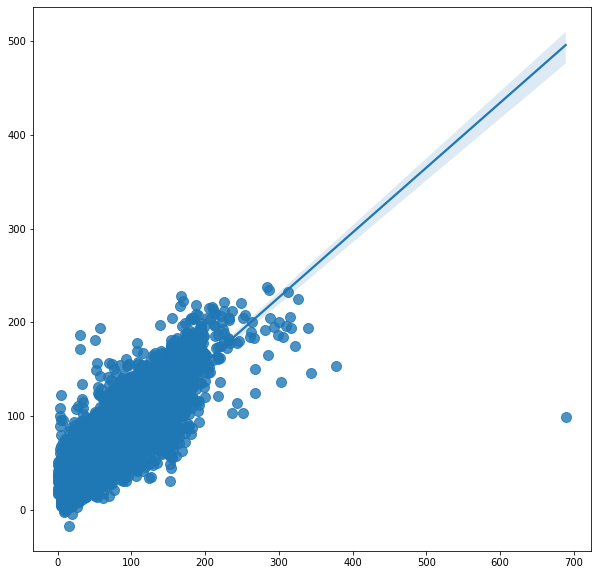

In [88]:
#graph of predicted vs actual
plt.figure(figsize=(10,10))
sns.regplot(y_valid, y_pred, fit_reg=True, scatter_kws={"s": 100})
#sns.lineplot(y_valid, y_pred)


In [89]:
#caculating the best RMSE
from sklearn.metrics import mean_squared_error 
np.sqrt(mean_squared_error(y_valid, y_pred))

23.973145690626176

**OTHER ALGORITHIMS DATA PREPARATION**

In [203]:
train_cp.shape

(30557, 74)

In [204]:
train = train_cp
test = test_cp
#replacing infinity values with nan again
train_cp.replace([np.inf, -np.inf], np.nan, inplace=True)
#getting the X data and y that has target values
X = train_cp.drop(labels=['Place_ID','target'], axis=1)
y = train_cp['target'].values
#dropping place ID as its irrelevant
test = test_cp.drop(['Place_ID'], axis=1)
#splitting into train test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)
#understanding our train test split
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((21389, 72), (21389,), (9168, 72), (9168,))

Feature scaling using MinMax

In [205]:
#scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)


x_test_scaled = scaler.fit_transform(X_valid)
x_test = pd.DataFrame(x_test_scaled)



Testing KNN regression algorithim

In [206]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [207]:
rmse_val = [] #to store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_valid) #make prediction on test set
    error = sqrt(mean_squared_error(y_valid,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 53.871862485220674
RMSE value for k=  2 is: 47.37968355446921
RMSE value for k=  3 is: 45.35605221347967
RMSE value for k=  4 is: 44.11259075102293
RMSE value for k=  5 is: 43.215336987188124
RMSE value for k=  6 is: 42.80206724142108
RMSE value for k=  7 is: 42.323140316495625
RMSE value for k=  8 is: 41.99518197352105
RMSE value for k=  9 is: 41.77578540642614
RMSE value for k=  10 is: 41.653250063322744
RMSE value for k=  11 is: 41.62430434267023
RMSE value for k=  12 is: 41.65732168756759
RMSE value for k=  13 is: 41.55831623112789
RMSE value for k=  14 is: 41.473158623825064
RMSE value for k=  15 is: 41.38287110682646
RMSE value for k=  16 is: 41.32931748751562
RMSE value for k=  17 is: 41.28994699186278
RMSE value for k=  18 is: 41.25403068489951
RMSE value for k=  19 is: 41.22012772287814
RMSE value for k=  20 is: 41.225010438162855
RMSE value for k=  21 is: 41.199084931914754
RMSE value for k=  22 is: 41.16988448989838
RMSE value for k=  23 is: 41.15759

plotting the rmse

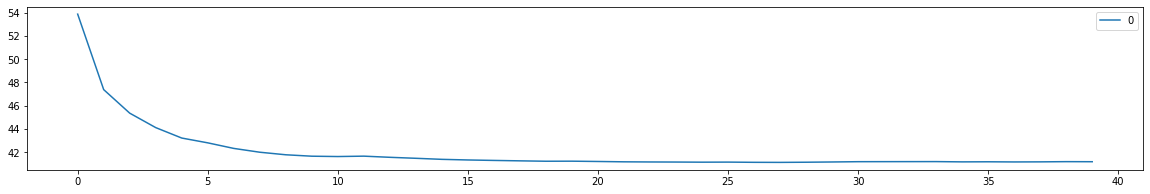

In [208]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

The above graph shows k=8 being the best value for our KNN prediction since it has the lowest RMSE

In [213]:
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [214]:
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 28)
knn_model.fit(X_train, y_train)  #fit the model
knn_pred=model.predict(X_valid) #make prediction on test set
# error = sqrt(mean_squared_error(y_test,knn_pred)) #calculate rmse
knn_mse = mean_squared_error(y_valid, knn_pred)
knn_rmse = knn_mse**.5
print(knn_mse)
print(knn_rmse)

1695.6799356982167
41.178634456453466


In [215]:
# print('Coefficients: \n', knn_model.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_valid, knn_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_valid, knn_pred))
# Explained variance score: 1 is perfect prediction
# print('R-squared: %.2f' % r2_score(y_valid, knn_pred))

Root mean squared error: 41.18
Mean absolute error: 30.20


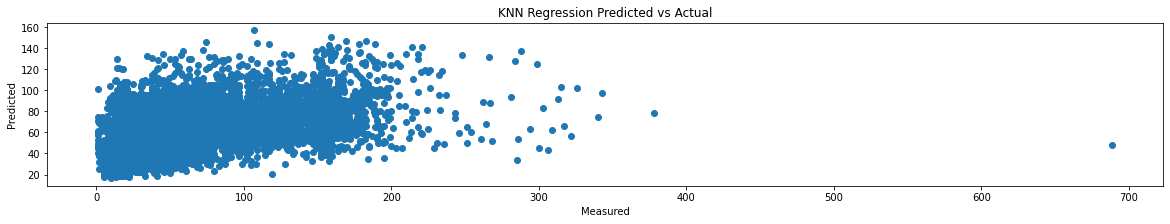

In [216]:
plt.scatter(y_valid, knn_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('KNN Regression Predicted vs Actual')
plt.show()

Random Forest Networks

In [217]:
from sklearn.ensemble import RandomForestRegressor

In [218]:
# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [219]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=1234)

In [220]:
# Score the model
decision_forest_score = regr_rf.score(X_valid, y_valid)
decision_forest_score

0.618494145930211

In [221]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_valid)

In [222]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_valid, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_valid, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
# print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 28.55
Mean absolute error: 19.81


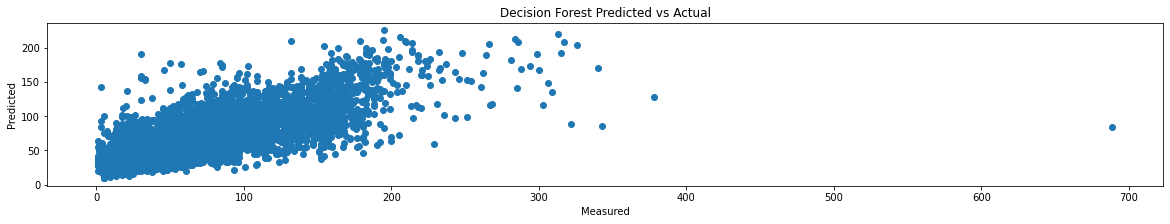

In [224]:
plt.scatter(y_valid, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

Extra Trees Regression

In [225]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [226]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [227]:
extratree_score = extra_tree.score(X_valid, y_valid)
extratree_score

0.6568741406046323

In [228]:
extratree_pred = extra_tree.predict(X_valid)

In [229]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_valid, extratree_pred)))

Root mean squared error: 27.07


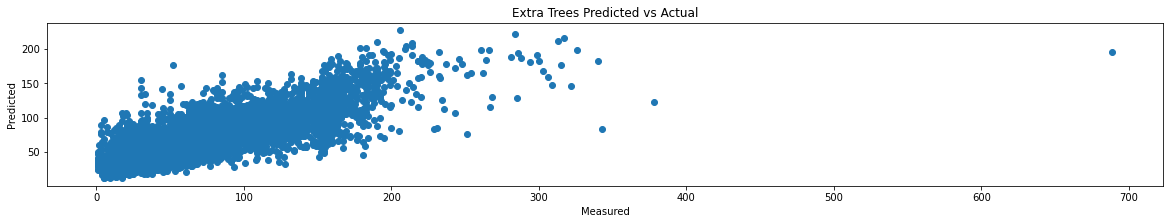

In [230]:
plt.scatter(y_valid, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

Linear Regression

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [233]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [234]:
lin_pred = regr.predict(X_valid)

In [235]:
linear_regression_score = regr.score(X_valid, y_valid)
linear_regression_score

0.4040793779710511

In [236]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_valid, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_valid, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_valid, lin_pred))

Coefficients: 
 [-1.16336324e-01  1.43507467e-01 -1.65995757e+03 -1.03861893e+00
 -8.94586113e-01  9.98174678e-01  6.65716622e+04  1.05575453e+05
  2.01378490e+00 -3.86568714e+00 -1.04541394e-05  1.46079714e-02
 -1.48465835e-01  7.60400491e-04  3.42137702e-01  2.01254068e+05
 -1.29196872e-03 -1.11003624e+05 -1.11161954e+02  5.66835376e-02
  2.36719812e+00 -8.16554589e-02 -1.31861107e-01  2.32143627e-02
 -1.00934344e-01  8.71370464e+02  7.01149866e-04 -3.11917309e-04
 -3.34369299e-05 -5.44866469e-03 -6.58493624e-03  1.43832357e-02
  2.72388776e-01 -1.21108939e+04  4.81634775e+01  1.77614129e-02
 -7.76789424e-03 -2.16476240e-02 -8.81228514e-02  1.16837051e+05
 -2.13531949e+01 -9.78098863e-02 -9.00310476e-03 -5.73813654e+00
 -5.65118250e-02  9.04500657e-02  9.03099988e-03  2.48946076e-03
  3.17767563e-01 -3.79657652e-02  3.69475291e-01  3.40526681e+00
  2.99728818e+00 -3.12430007e-03  5.13643278e-02 -3.93590119e-02
 -5.96070350e-03 -1.30928990e+00  4.61485818e+02  1.16743380e+01
  6.06753

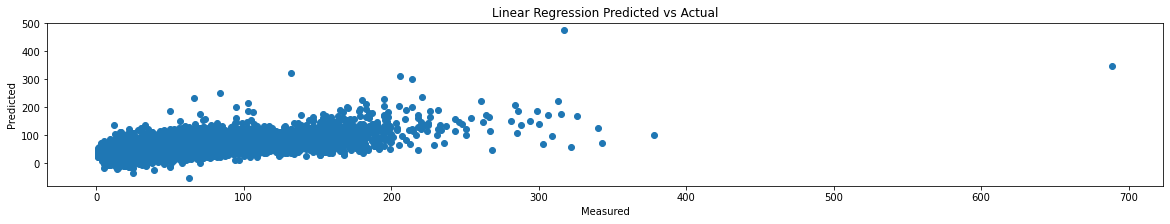

In [237]:
plt.scatter(y_valid, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

**Plotting the RMSE and MSE values for our regression algorithims compared**

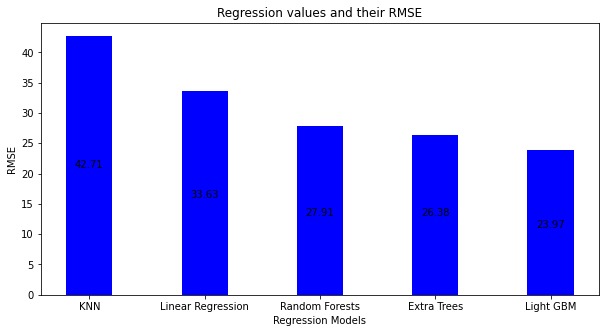

In [238]:
# creating the dataset
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
data = {
    'KNN':42.71,
    'Linear Regression':33.63,
    'Random Forests':27.91,
    'Extra Trees':26.38,
    "Light GBM": 23.97

        }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
addlabels(courses, values) 
plt.xlabel("Regression Models")
plt.ylabel("RMSE")
plt.title("Regression values and their RMSE")
plt.show()